In [1]:
import numpy as np
import pandas as pd

train_df = pd.read_table(r'input_data/train.tsv')
test_df = pd.read_table(r'input_data/test.tsv')

print(train_df.shape)


(1482535, 8)


In [2]:
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
test_df.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [4]:
train_df = train_df.drop(train_df[(train_df.price < 3.0)].index)
print(train_df.shape)
print(train_df['price'].max())
print(train_df['price'].min())

(1481661, 8)
2009.0
3.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

train_df['price'].hist(range=(0, 100))
plt.show()

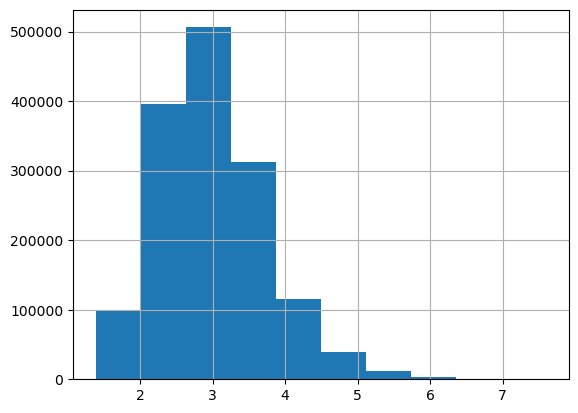

In [ ]:
train_df['target'] = np.log1p(train_df.price)
train_df['target'].hist()
plt.show()

In [ ]:
def split_cat(text):
    try: return text.split('/')
    except: return ('No Label', 'No Label', 'No Label')

train_df['subcat_0'], train_df['subcat_1'], train_df['subcat_2'] = zip(* train_df['category_name'].apply(lambda x: split_cat(x)))
test_df['subcat_0'], test_df['subcat_1'], test_df['subcat_2'] = zip(* test_df['category_name'].apply(lambda x:split_cat(x)))

In [ ]:
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,target,subcat_0,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces


In [ ]:
test_df.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description,subcat_0,subcat_1,subcat_2
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7,Women,Jewelry,Rings
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined...",Other,Office supplies,Shipping Supplies
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...,Vintage & Collectibles,Bags and Purses,Handbag
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...,Women,Sweaters,Cardigan
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...,Other,Books,Religion & Spirituality


In [ ]:
full_set = pd.concat([train_df, test_df])

all_brands = set(full_set['brand_name'].values)

train_df['brand_name'].fillna(value='missing', inplace=True)
test_df['brand_name'].fillna(value='missing', inplace=True)

train_premissing = len(train_df.loc[train_df['brand_name'] == 'missing'])
test_premissing = len(test_df.loc[test_df['brand_name'] == 'missing'])

def brand_finder(line):
    brand = line[0]
    name = line[1]
    namesplit = name.split(' ')

    if brand == 'missing':
        for x in namesplit:
            if x in all_brands:
                return name
    if name in all_brands:
        return name
    
    return brand

train_df['brand_name'] = train_df[['brand_name', 'name']].apply(brand_finder, axis=1)
test_df['brand_name'] = test_df[['brand_name', 'name']].apply(brand_finder, axis=1)

train_len = len(train_df.loc[train_df['brand_name'] == 'missing'])
test_len = len(test_df.loc[test_df['brand_name'] == 'missing'])
train_found = train_premissing - train_len
test_found = test_premissing - test_len
print(train_premissing)
print(train_found)
print(test_premissing)
print(test_found)

632336
137342
295525
64154


In [ ]:
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,target,subcat_0,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,MLB Cincinnati Reds T Shirt Size XL,10.0,1,No description yet,2.397895,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,missing,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,missing,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces


In [ ]:
from sklearn.model_selection import train_test_split
import gc

train_dfs, dev_dfs = train_test_split(train_df, random_state=123, train_size=0.99, test_size=0.01)

n_trains = train_dfs.shape[0]
n_devs = dev_dfs.shape[0]
n_tests = test_df.shape[0]
print('Training : ', n_trains, 'examples')
print('Validation : ', n_devs, 'examples')
print('Testing : ', n_tests, 'examples')
del train_df
gc.collect()

Training :  1466844 examples
Validation :  14817 examples
Testing :  693359 examples


15

In [ ]:
full_df = pd.concat([train_dfs, dev_dfs, test_df])


NameError: name 'train_df' is not defined

In [ ]:
def fill_missing_values(df):
    df['category_name'].fillna(value='missing', inplace=True)
    df['brand_name'].fillna(value='missing', inplace=True)
    df['item_description'].fillna(value='missing', inplace=True)
    df['item_description'].replace('No description yet', 'missing', inplace=True)

    return df

full_df = fill_missing_values(full_df)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(full_df.category_name)
full_df['category'] = le.transform(full_df.category_name)

le.fit(full_df.brand_name)
full_df.brand_name = le.transform(full_df.brand_name)

le.fit(full_df.subcat_0)
full_df.subcat_0 = le.transform(full_df.subcat_0)

le.fit(full_df.subcat_1)
full_df.subcat_1 = le.transform(full_df.subcat_1)

le.fit(full_df.subcat_2)
full_df.subcat_2 = le.transform(full_df.subcat_2)
del le
print(full_df.brand_name.head())
print(full_df.category_name.head())
print(full_df.subcat_0.head())
print(full_df.subcat_1.head())
print(full_df.subcat_2.head())


0     99781
1    133889
2    154438
3    177922
4    177922
Name: brand_name, dtype: int32
0                                    Men/Tops/T-shirts
1    Electronics/Computers & Tablets/Components & P...
2                          Women/Tops & Blouses/Blouse
3                   Home/Home Décor/Home Décor Accents
4                              Women/Jewelry/Necklaces
Name: category_name, dtype: object
0     5
1     1
2    10
3     3
4    10
Name: subcat_0, dtype: int32
0    103
1     30
2    104
3     55
4     58
Name: subcat_1, dtype: int32
0    774
1    215
2     97
3    410
4    542
Name: subcat_2, dtype: int32


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

print("Transforming text data to sequence...")
raw_text = np.hstack([full_df.item_description.str.lower(), 
                      full_df.name.str.lower(),
                      full_df.category_name.str.lower()])
print('sequence shape', raw_text.shape)

print(" Fitting Tokenizer...")
tok_raw = Tokenizer()
tok_raw.fit_on_texts(raw_text)

full_df['seq_item_description'] = tok_raw.texts_to_sequences(
    full_df.item_description.str.lower())
full_df['seq_name'] = tok_raw.texts_to_sequences(
    full_df.name.str.lower())
del tok_raw


Transforming text data to sequence...
sequence shape (6525060,)
 Fitting Tokenizer...


In [ ]:
from keras.preprocessing.sequence import pad_sequences
print(pad_sequences(full_df.seq_item_description, maxlen=80), '\n')
print(pad_sequences(full_df.seq_name, maxlen=10))

[[    0     0     0 ...     0     0    83]
 [    0     0     0 ...    14    63  1108]
 [    0     0     0 ...   224     8    79]
 ...
 [    0     0     0 ...    19 63533   109]
 [    0     0     0 ...     5   417    90]
 [    0     0     0 ...     5   689   728]] 

[[    0     0     0 ...   101     7   198]
 [    0     0     0 ... 27977 17417  2787]
 [    0     0     0 ...  7910 10940   275]
 ...
 [    0     0     0 ...   475  1669   109]
 [    0     0     0 ...   393   340  2343]
 [    0     0     0 ...  1002    41    89]]


In [ ]:
MAX_NAME_SEQ = 10
MAX_ITEM_DESC_SEQ = 75
MAX_CATEGORY_SEQ = 8

MAX_TEXT = np.max(
    [np.max(full_df.seq_name.max()),
     np.max(full_df.seq_item_description.max())]) + 100

MAX_CATEGORY = np.max(full_df.category.max()) + 1

MAX_BRAND = np.max(full_df.brand_name.max()) + 1

MAX_CONDITION = np.max(full_df.item_condition_id.max()) + 1

MAX_DESC_LEN = np.max(full_df.desc_len.max()) + 1

MAX_NAME_LEN = np.max(full_df.name_len.max()) + 1

MAX_SUBCAT_0 = np.max(full_df.subcat_0.max()) + 1
MAX_SUBCAT_1 = np.max(full_df.subcat_1.max()) + 1
MAX_SUBCAT_2 = np.max(full_df.subcat_2.max()) + 1

NameError: name 'np' is not defined

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_rnn_data(dataset):
    X = {
        'name':pad_sequences(dataset.seq_name, maxlen=MAX_NAME_SEQ),
        'item_desc':pad_sequences(dataset.seq_item_description, maxlen=MAX_ITEM_DESC_SEQ),
        'brand_name':np.array(dataset.brand_name),
        'category':np.array(dataset.category),
        'item_condition':np.array(dataset.item_condition),
        'num_vars':np.array(dataset[['shipping']]),
        'desc_len':np.array(dataset[["desc_len"]]),
        'name_len':np.array(dataset[["name_len"]]),
        'subcat_0':np.array(dataset.subcat_0),
        'subcat_1':np.array(dataset.subcat_1),
        'subcat_2':np.array(dataset.subcat_2)
    }
    return X

train = full_df[:n_trains]

dev = full_df[n_trains:n_trains+n_devs]

test = full_df[n_trains+n_devs:]

X_train = get_rnn_data(train)